In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip /content/gdrive/MyDrive/NeuralNetwork/data.zip > /dev/null

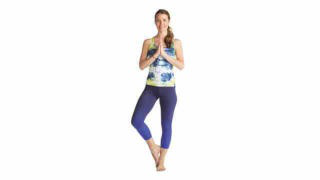

In [ ]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('data/Train/Yoga_236.jpg')
img

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers


data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
import os
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np
from random import shuffle

train_data = []

for i in os.listdir('/content/data/Train'):
  img = tf.keras.preprocessing.image.load_img(os.path.join('/content/data/Train',i),target_size =(224,224,3))
  img = tf.keras.utils.img_to_array(img)

  augmented_image = data_augmentation(img)
  augmented_image =tf.keras.utils.img_to_array(augmented_image)

  image_label = i.split('_')[0]

  train_data.append((img, image_label))
  train_data.append((augmented_image, image_label))


shuffle(train_data)

train_images = []
train_labels = []

for i in range(len(train_data)):
  train_images.append(train_data[i][0])
  train_labels.append(train_data[i][1])

classes = ["Basketball", "Football", "Rowing", "Swimming", "Tennis", "Yoga"]

mapping = {}
for i in range(len(classes)):
  mapping[classes[i]] = i

# integer representation
for i in range(len(train_labels)):
  train_labels[i] = mapping[train_labels[i]]

encoded_labels = to_categorical(train_labels)

train_images = np.array(train_images) 

In [ ]:
print(train_images)

In [ ]:
import os

test_images = []
test_images_names = []
for i in os.listdir('/content/data/Test'):
  img = tf.keras.preprocessing.image.load_img(os.path.join('/content/data/Test',i),target_size =(224,224,3))
  img = tf.keras.utils.img_to_array(img)
  test_images.append(img)
  test_images_names.append(i)

test_images = np.array(test_images) 

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import MaxPool2D
from keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization
import numpy as np

def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(6, activation='sigmoid', name='output'))
    return model

model = VGG16()
#Model Summary
model.summary()
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [ ]:
Vgg16.load_weights("/content/vgg_Weights.h5")
for layer in Vgg16.layers:
    layer.trainable = False
for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.conv2d.Conv2D object at 0x7f44200aa5e0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f44200aae20> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f44200aafd0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f4420208b80> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f4420062730> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f44200aaac0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f43ca616700> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f43ca624850> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f43ca6249a0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f4434fc4070> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f43ca616790> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f43ca6243d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f43ca62b6a0> False
<keras.layers.poo

In [ ]:
from keras.optimizers import Adam
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'Adam', metrics=['accuracy'])


In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint

es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)
H = model.fit(train_images, encoded_labels , validation_split=0.2, epochs = 100, batch_size = 64, steps_per_epoch = train_images.shape[0]//64, callbacks = [es, mc], verbose=1)

Epoch 1/100
52/52 [==============================] - 31s 461ms/step - loss: 9.0362 - accuracy: 0.7106 - val_loss: 3.0809 - val_accuracy: 0.8514
Epoch 2/100
52/52 [==============================] - 20s 389ms/step - loss: 0.4881 - accuracy: 0.9608 - val_loss: 2.7371 - val_accuracy: 0.8618
Epoch 3/100
52/52 [==============================] - 19s 375ms/step - loss: 0.1088 - accuracy: 0.9862 - val_loss: 2.0852 - val_accuracy: 0.8811
Epoch 4/100
52/52 [==============================] - 19s 374ms/step - loss: 0.0471 - accuracy: 0.9936 - val_loss: 2.0454 - val_accuracy: 0.8886
Epoch 5/100
52/52 [==============================] - 19s 366ms/step - loss: 0.0134 - accuracy: 0.9972 - val_loss: 2.3628 - val_accuracy: 0.8886
Epoch 6/100
52/52 [==============================] - 20s 377ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 2.1908 - val_accuracy: 0.8826
Epoch 7/100
52/52 [==============================] - 19s 372ms/step - loss: 7.8044e-05 - accuracy: 1.0000 - val_loss: 2.1597 - val_accur

In [ ]:
y_predictions = model.predict(test_images)
print(y_predictions)

22/22 [==============================] - 7s 217ms/step
[[3.28513692e-13 2.84668913e-25 0.00000000e+00 4.71732434e-17
  2.85168353e-04 1.00000000e+00]
 [9.99993682e-01 9.18825776e-07 1.00000000e+00 1.00000000e+00
  2.88456311e-27 1.82044681e-32]
 [3.44233114e-11 3.76313276e-24 2.79232053e-33 1.15577846e-10
  9.99998331e-01 1.00000000e+00]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 4.75742300e-18
  1.40180006e-07 2.23582753e-37]
 [1.82163423e-10 1.07172411e-04 5.69740034e-21 3.28260745e-20
  1.00000000e+00 5.78434023e-10]
 [1.83641734e-19 9.88393135e-12 3.06352572e-14 1.00000000e+00
  1.13313083e-08 9.99999642e-01]]


In [ ]:
result = []
for i in y_predictions:
  result.append(np.argmax(i))

import csv
with open('result.csv', 'w', newline='') as csv_file:
      fieldnames = ['image_name', 'label']
      writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
      writer.writeheader()
      for i in range(len(result)):
          writer.writerow({'image_name': test_images_names[i], 'label': result[i]})

In [ ]:
import os
import urllib.request
urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=1pjBpzyKE7QmvKZRy5zUFxDXYZQ5F7ow0', 'vgg_Weights.h5')


('vgg_Weights.h5', <http.client.HTTPMessage at 0x7f43ca268d60>)